In [119]:
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Identificando donde esta ubicado la cara

219 260 806 847


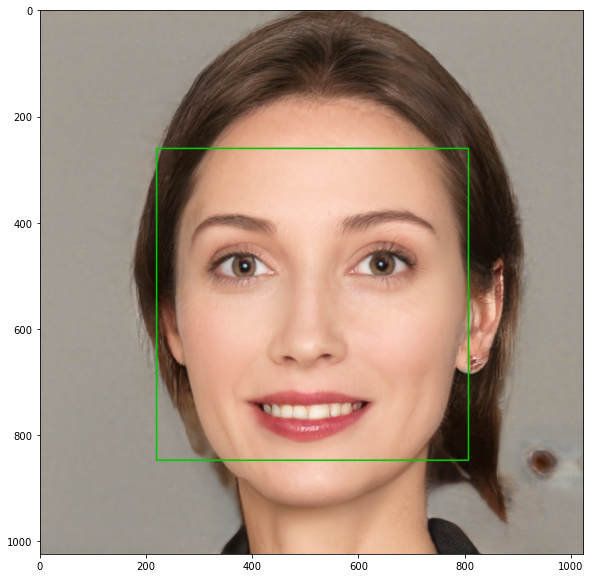

In [120]:
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
image = cv2.imread('../PDITARRAGA/099739.jpg')
Filas,Columnas,Canales=image.shape
Min_SizeFila=round(0.1*Filas)
Min_SizeCol=round(0.1*Columnas)
Max_SizeFila=round(0.6*Filas)
Max_SizeCol=round(0.6*Columnas)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceClassif.detectMultiScale(gray,
    scaleFactor=1.10,
    minNeighbors=5,
    minSize=(Min_SizeFila,Min_SizeCol),
    maxSize=(Max_SizeFila,Max_SizeCol))
##
for (x,y,w,h) in faces:
    x0=x # Coordenada inicial de las columnas 
    y0=y # Coordenada inicial de las Filas
    x1=x+w
    y1=y+h
    image=cv2.rectangle(image,(x0,y0),(x1,y1),(0,200,0),2)
#
print(x0,y0,x1,y1)
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
## Definicion de tamanos
plt.figure(figsize = (20,10))
plt.imshow(rgb_img)

## Definido la cara se subdivide la parte superior

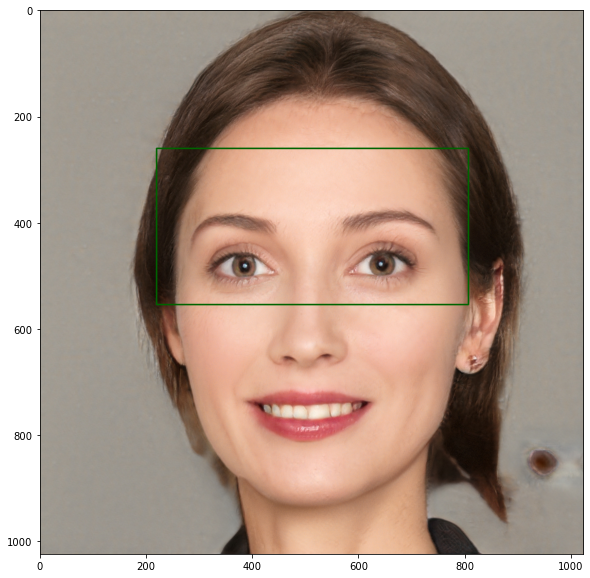

In [121]:
image2 = cv2.imread('../PDITARRAGA/099739.jpg')
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
y1=round(y0+h/2)
image2=cv2.rectangle(image2,(x0,y0),(x1,y1),(0,100,0),2)
rgb_img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
## Definicion de tamanos
plt.figure(figsize = (20,10))
plt.imshow(rgb_img2)

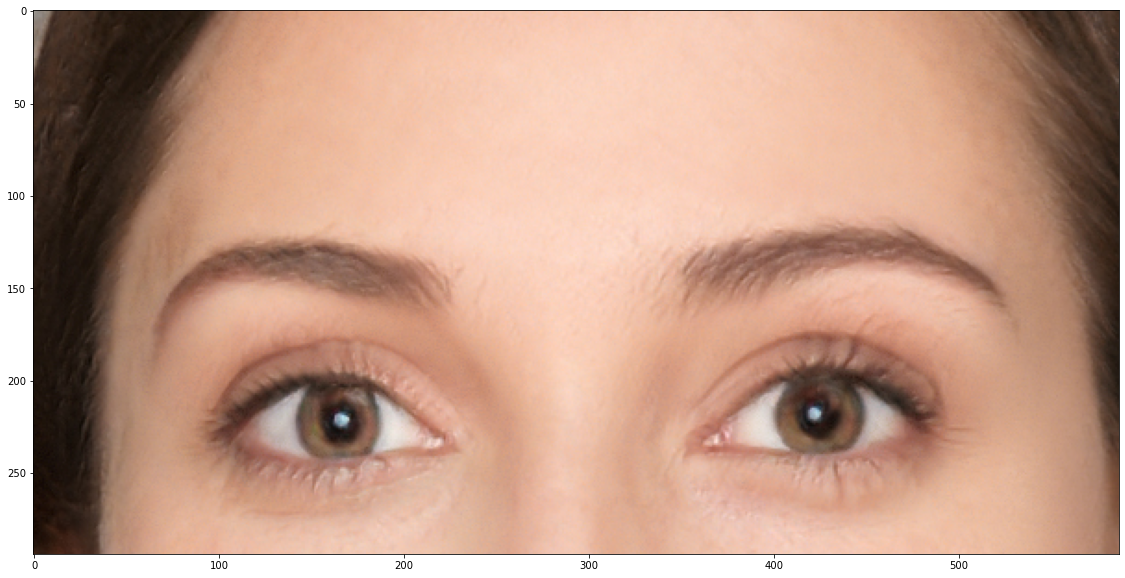

In [122]:
image3 = cv2.imread('../PDITARRAGA/099739.jpg')
rgb_img3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
## Definicion de tamanos
cuadro=rgb_img3[y0:y1,x0:x1]
## Definicion de tamanos
plt.figure(figsize = (20,10))
plt.imshow(cuadro)

## Ahora se busca objetivamente donde estan ubicados los ojos

In [123]:
BlancoBajo = np.array([0, 0, 0], np.uint8)
BlancoAlto = np.array([255, 15, 255], np.uint8)
frameHSV = cv2.cvtColor(cuadro, cv2.COLOR_BGR2HSV)
maskBlanco = cv2.inRange(frameHSV, BlancoBajo,BlancoAlto)
## Eliminando ruido
kernel = np.ones((5,5), np.uint8)
maskBlanco_dilation = cv2.dilate(maskBlanco, kernel, iterations=4) 

3


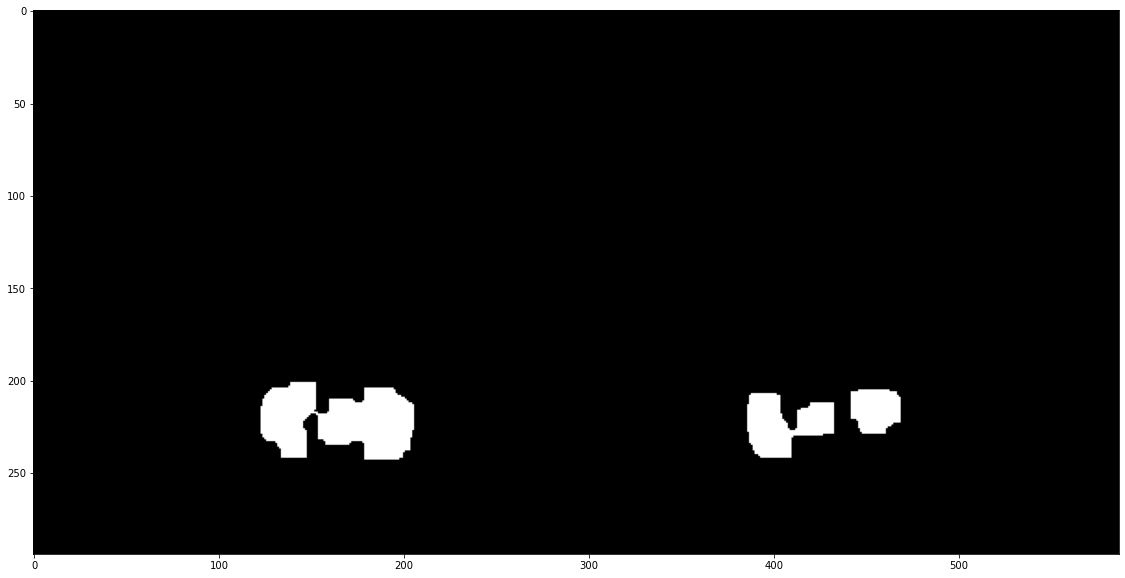

In [124]:
## Encontrando los contornos
contornos,_ = cv2.findContours(maskBlanco_dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) ## Bordes externos,
#cv2.drawContours(frame, contornos, -1, (255,0,0), 3)
maskcontornos = cv2.drawContours(maskBlanco_dilation, contornos, -1, (0,255,75), 2)
print(len(contornos))
plt.figure(figsize = (20,10))
plt.imshow(maskcontornos, cmap=plt.cm.gray)

In [125]:
for j in contornos:
    area = cv2.contourArea(j)
    if area > 50:
        M = cv2.moments(j)
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            print(f"x: {cx } y: {cy } z:{area }")

x: 405 y: 223 z:1330.5
x: 454 y: 215 z:714.5
x: 164 y: 221 z:2918.5
